In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

# view load_breast_cancer
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
# create dataframe with features
df = pd.DataFrame(data['data'], columns=data['feature_names'])

# add target to dataframe
df['target'] = data['target']

# view dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# data preprocessing

# check for null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
# check if data is balanced
df['target'].value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [9]:
# do EDA
import matplotlib.pyplot as plt
import seaborn as sns

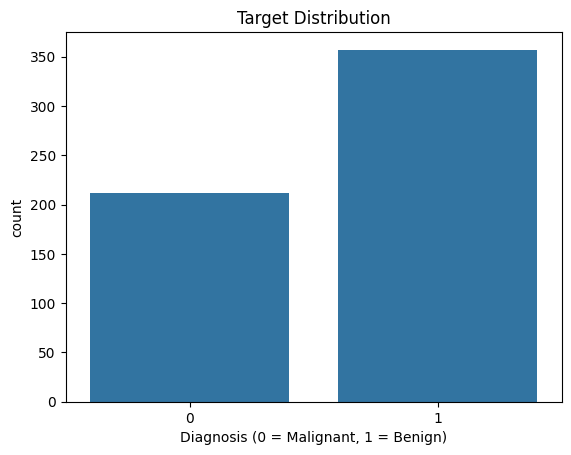

In [12]:
# visualize distribution of target value
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
plt.show()

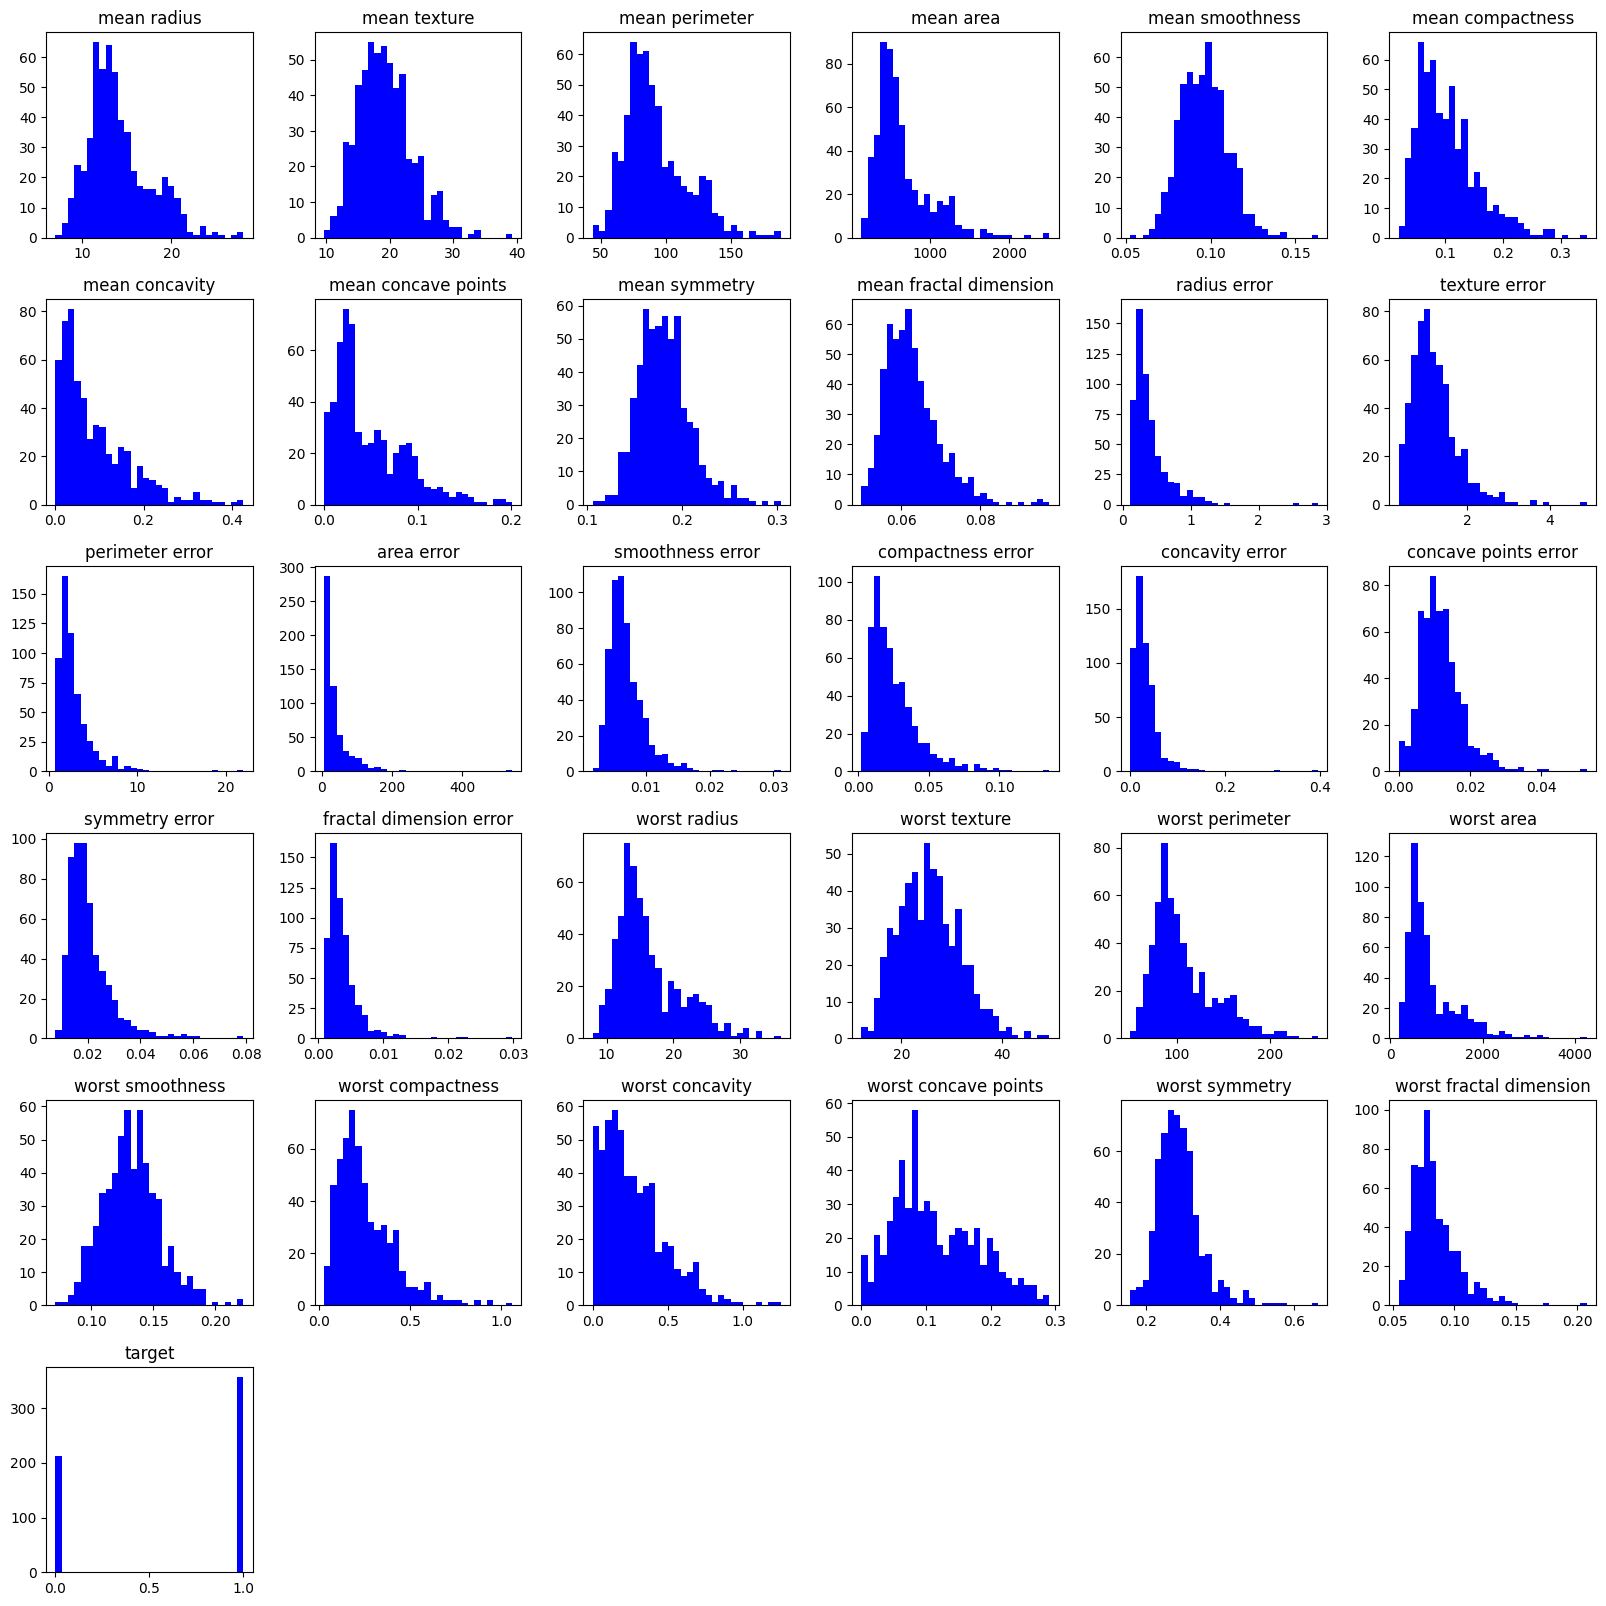

In [13]:
# viualize the distribution of the features

df.hist(bins=30, figsize=(20,20), color='b', grid=False)
plt.show()

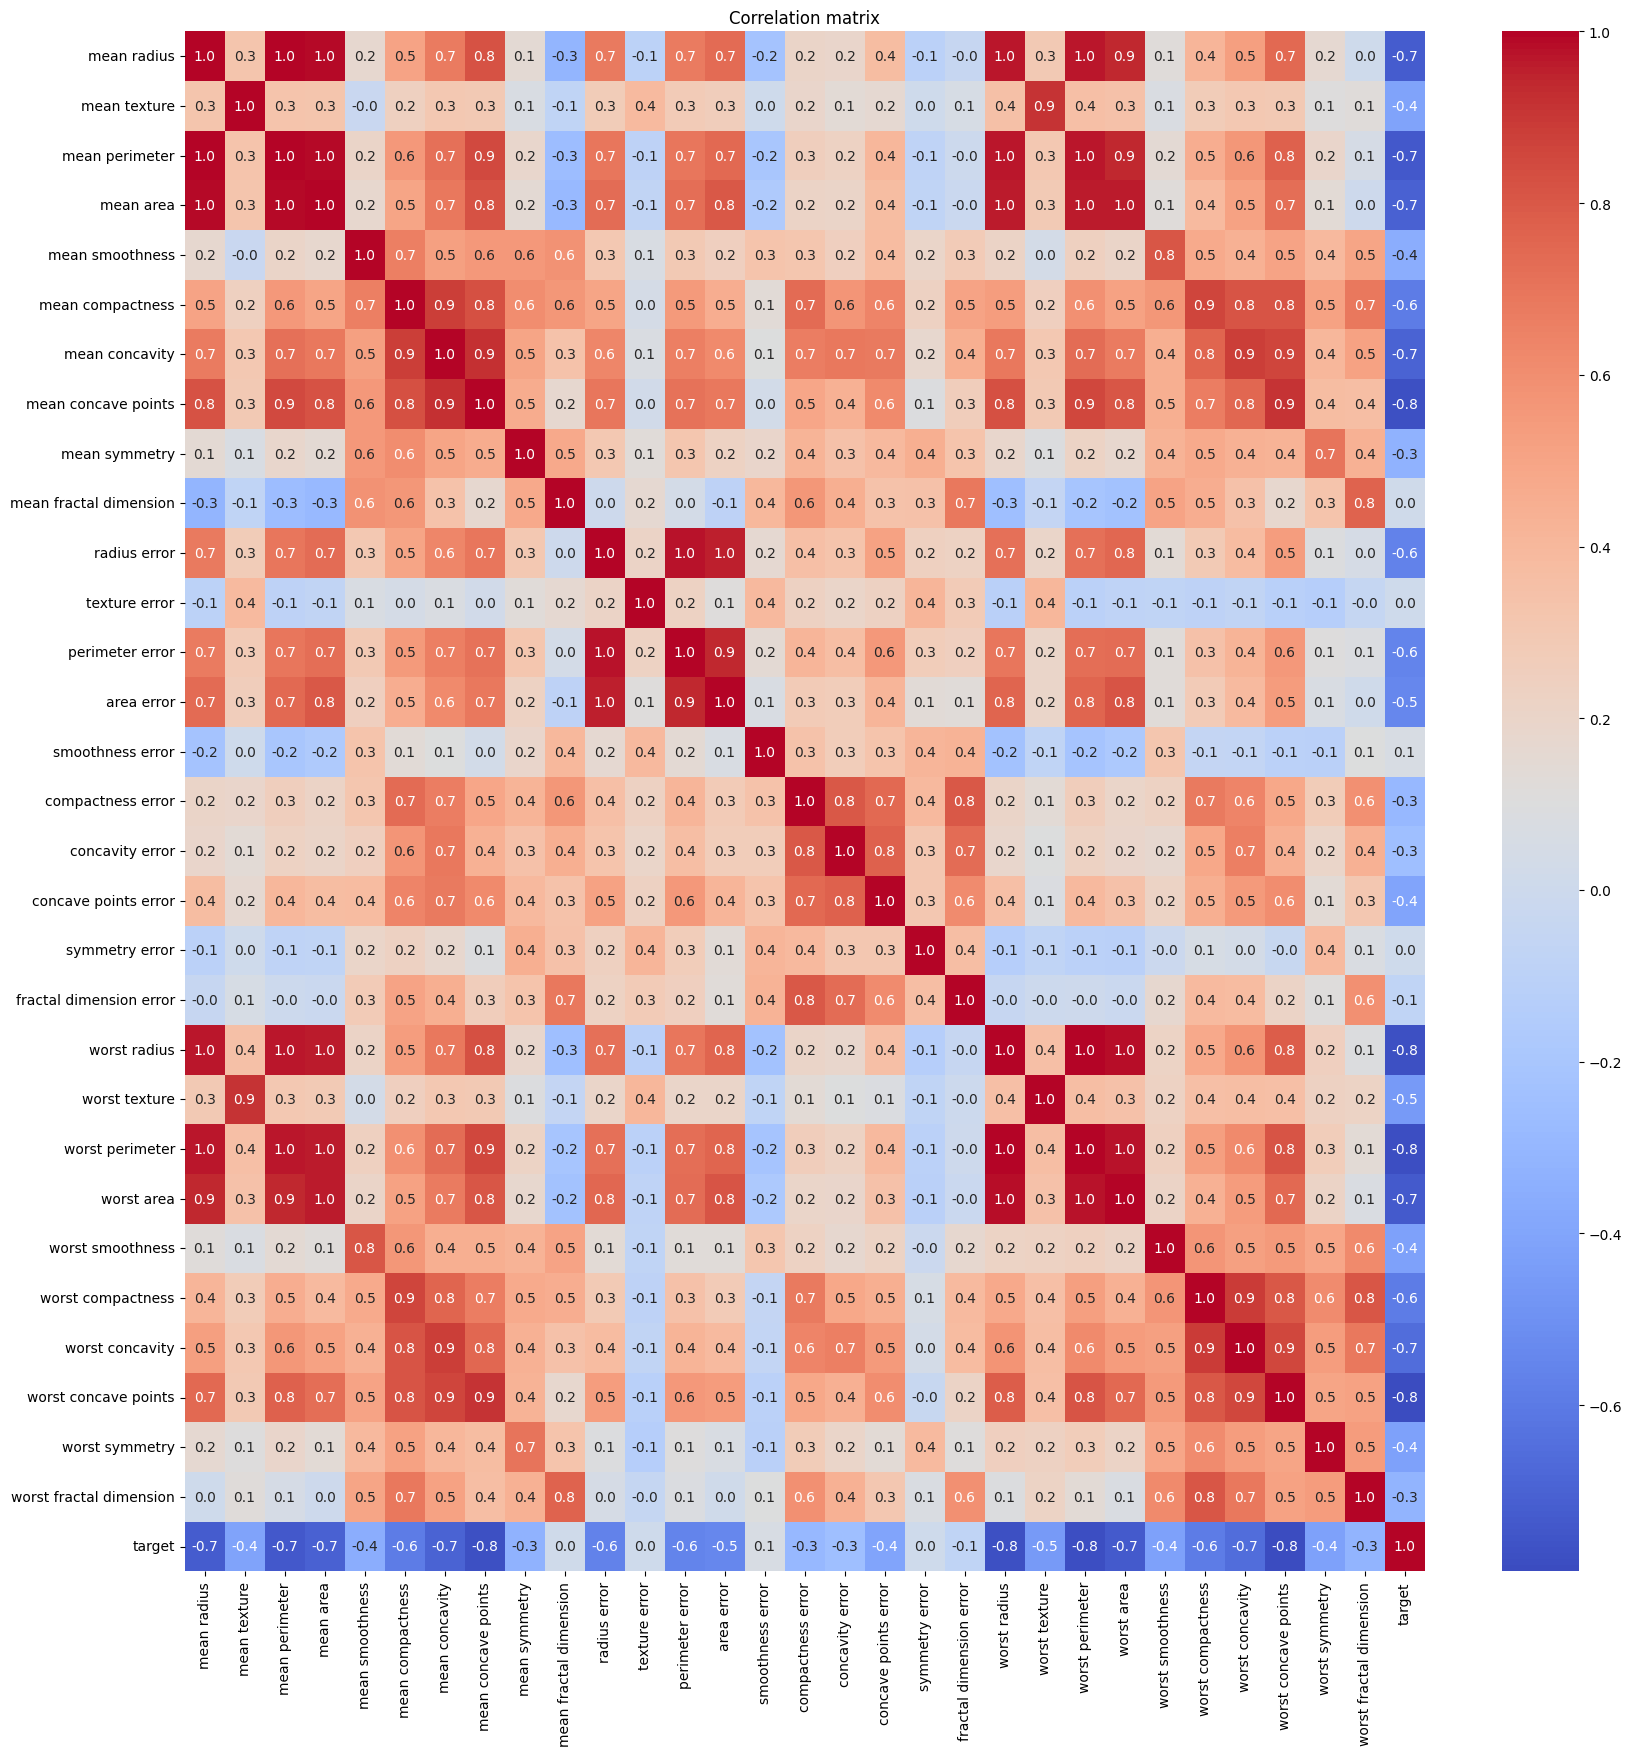

In [14]:
# correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix')
plt.show()

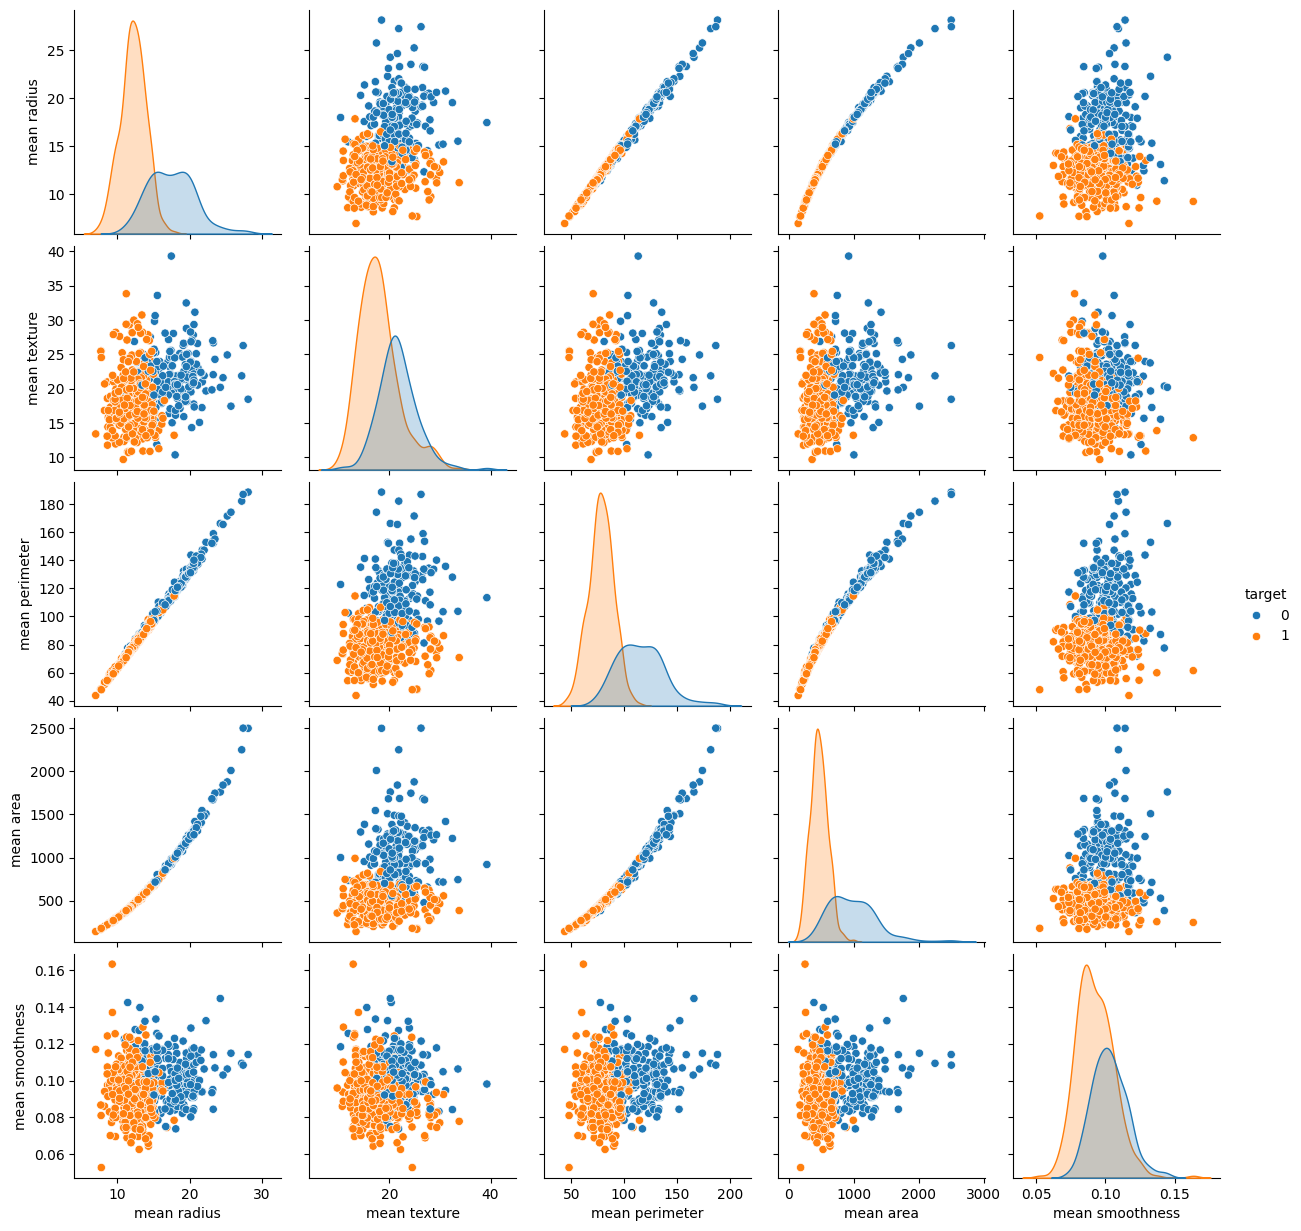

In [15]:
# pairplot
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
plt.show()

In [16]:
# apply naive bayes

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [18]:
# split data in training and testing sets

X = df.drop('target', axis=1)
y = df['target']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# define parameter grid for var_smoothing
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# create naive bayes model
gnb = GaussianNB()

# create grid search object
grid_search = GridSearchCV(estimator=gnb, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring='accuracy')

# fit grid search object to training data
grid_search.fit(X_train, y_train)

# get the best parameters and accuracy
print('Best parameters: ', grid_search.best_params_)
print('Best accuracy: {:.2f}% '.format(grid_search.best_score_ * 100))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:  {'var_smoothing': 2.310129700083158e-09}
Best accuracy: 93.41% 


In [21]:
# make predictions
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(x_test)

In [22]:
# calculate acuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 96.49%


In [25]:
# print classification report
print('Classification report with best parameters')
print(classification_report(y_test, y_pred))

Classification report with best parameters
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



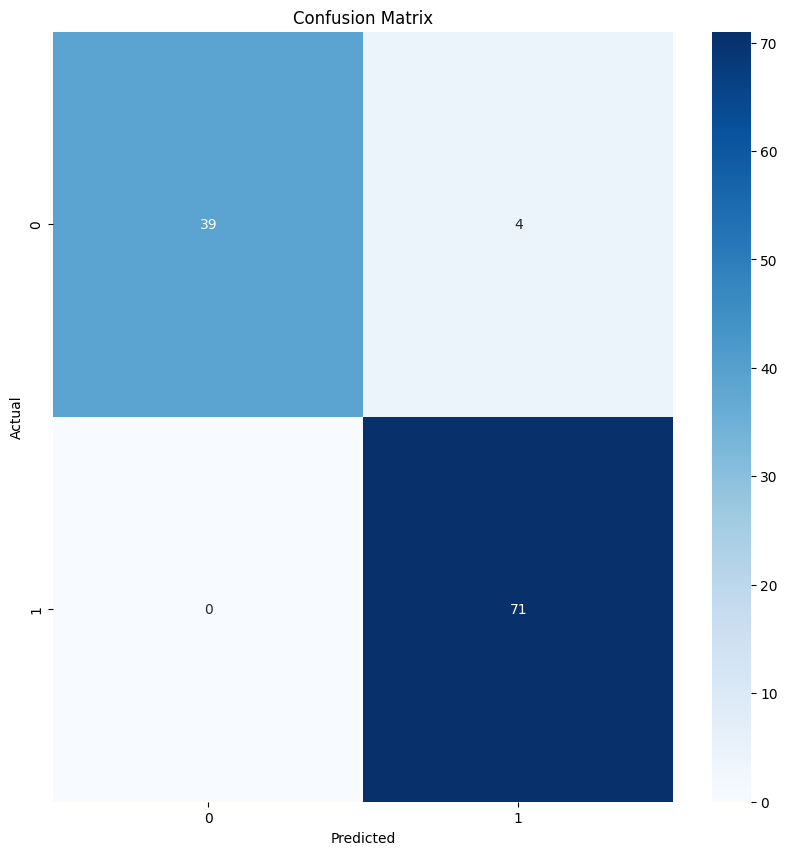

In [26]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()